<a href="https://colab.research.google.com/github/yashsj/ML_Python/blob/master/Linear_regression_for_Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded=files.upload()

Saving moore.csv to moore (1).csv


In [8]:

import requests
from bs4 import BeautifulSoup
import pandas as pd


%config IPCompleter.greedy = True

# Output multiple statements from one input cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
table_from_top = 1
wikipedia_page = 'Transistor Count'
trace = False

In [10]:
wikipedia_url = 'https://en.wikipedia.org/wiki/Transistor_count'.format(wikipedia_page)
page = requests.get(wikipedia_url)
soup = BeautifulSoup(page.content, 'lxml')
tables = soup.find_all('table', {'class': 'wikitable'})
table = tables[table_from_top - 1]

In [11]:
feature_names = []

header_row = table.find('tr')
for header in header_row.find_all('th'):
    feature_name = ' '.join(header.find_all(text=True))
    feature_name.replace('\n', '')
    feature_names.append(feature_name)


'Processor '

'MOS transistor  count'

'Date of introduction'

'Designer'

'MOS   process ( nm )'

'Area ( mm 2 )'

In [13]:
import pandas as pd


In [14]:
sample_rows = table.find_all('tr')[1:]

In [24]:
import re
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
from builtins import range

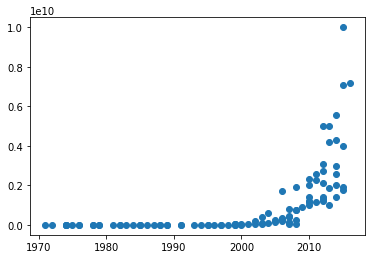

In [43]:
X=[]
Y=[]
non_decimal=re.compile(r'[^\d]+')
for line in open('moore.csv'):
    r=line.split('\t')
    
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))

    X.append(x)
    Y.append(y)

X=np.array(X)
Y=np.array(Y)
#Raw-Data
plt.scatter(X,Y);
Y=np.log(Y)


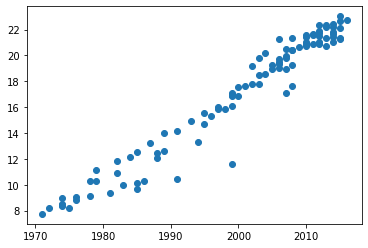

In [30]:
plt.scatter(X,Y)

Co-ef are: 0.35104357336499337 and -685.0002843816548
0.999107966867178


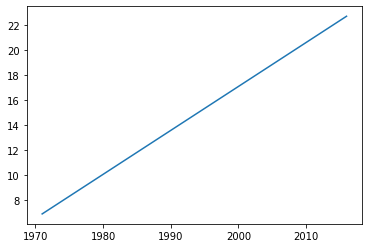

In [37]:
den=X.dot(X)-X.mean()*X.sum()
a=(X.dot(Y)-Y.mean()*X.sum())/den
b=(Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/den

lin=a*X+b
d1 =Y-lin
d2=Y--Y.mean()
plt.plot(X,lin)
rsqr=1-d1.dot(d1)/d2.dot(d2)
print("Co-ef are:",a,"and",b)
print(rsqr)

In [44]:
print("Here is Moore's Law", np.log(2)/a,"years")

Here is Moore's Law 1.974533172379868 years
